In [ ]:
import pandas as pd
repo = "https://raw.githubusercontent.com/rcamwm/DATA301-project-data/main/"

# Summary
Observational units are days of the calendar year. Each unit includes a year, a month, and a day, formatted as `YYYY-MM-DD`.

Variables are:
* Change in value of the NASDAQ
* Maximum difference in value of the NASDAQ
* Closing Price of NASDAQ
* Change in value of the SP500
* Maximum difference in value of the SP500
* Closing Price of SP500
* Change in value of Ethereum
* Maximum difference in value of Ethereum
* Closing Price of Ethereum

Change in value variables are measured by subtracting the day's opening value from its closing value, while maximum difference variables are measured by subtracting the day's lowest value from its highest value.  

Opening, closing, lowest, and highest values are all publicly available from stock exchanges. 

# Data Cleaning

## Ethereum Dataset

### Description
The data shows the change in Ethereum's price from 2017 to roughly the present. 

### Cleaning Process
Set the index to the `Date` column, and created new columns for each day's change in value as well as the maximum difference in value. These new columns were then moved to a new DataFrame. 

In [ ]:
# Import Ethereum dataset and set index to data
df_ethereum = pd.read_csv(
    repo + "ETH-USD-2.csv",
    index_col="Date", 
    parse_dates=True
)
df_ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09


In [ ]:
# Condense and clean up data into new DataFrame
df_ethereum["% Day Change ETH"] = (
    df_ethereum["Close"] - df_ethereum["Open"]
) / df_ethereum["Open"]
df_ethereum["Max Difference ETH"] = df_ethereum["High"] - df_ethereum["Low"]

df_ethereum_clean = df_ethereum[
    ["% Day Change ETH", "Max Difference ETH", "Close"]
].rename(columns={"Close":"Close ETH"})
df_ethereum_clean.head()

,% Day Change ETH,Max Difference ETH,Close ETH
Date,,,
2017-11-09,0.039654,22.395996,320.884003
2017-11-10,-0.066791,30.175995,299.252991
2017-11-11,0.053904,21.261017,314.681000
2017-11-12,-0.021551,20.640015,307.907990
2017-11-13,0.031564,21.390015,316.716003


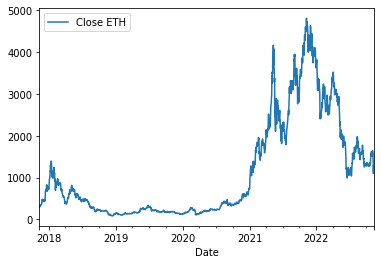

In [ ]:
df_ethereum_clean[["Close ETH"]].plot.line()

## NASDAQ Dataset

### Description
The data shows the change in the NASDAQ's price from 2017 to roughly the present. 

### Cleaning Process
Set the index to the `Date` column after running it through a function to reformat it. Also created new columns for each day's change in value as well as the maximum difference in value. These new columns were then moved to a new DataFrame. 

In [ ]:
# Import NASDAQ dataset and set index to data
df_nasdaq = pd.read_csv(repo + "NASDAQ.csv",
    index_col="Date", 
    parse_dates=True
)

In [ ]:
# Condense data into new DataFrame
df_nasdaq["Close NASDAQ"] = df_nasdaq["Close/Last"]
df_nasdaq["% Day Change NASDAQ"] = (
    df_nasdaq["Close/Last"] - df_nasdaq["Open"]
) / df_nasdaq["Open"]
df_nasdaq["Max Difference NASDAQ"] = df_nasdaq["High"] - df_nasdaq["Low"]

df_nasdaq_clean = df_nasdaq.loc[
    ~((df_nasdaq["High"] == 0) & (df_nasdaq["Low"] == 0)) # filter out entries with no data
][["Close NASDAQ", "% Day Change NASDAQ", "Max Difference NASDAQ"]]

df_nasdaq_clean.head()

,Close NASDAQ,% Day Change NASDAQ,Max Difference NASDAQ
Date,,,
2022-11-11,11323.33,0.017850,282.60
2022-11-10,11114.15,0.022539,339.16
2022-11-09,10353.17,-0.016946,220.96
2022-11-08,10616.20,0.000440,272.91
2022-11-07,10564.52,0.004524,159.05


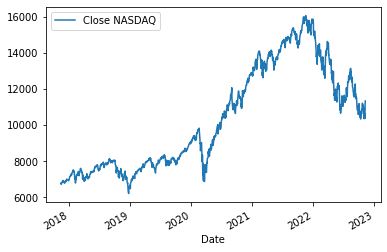

In [ ]:
df_nasdaq_clean[["Close NASDAQ"]].plot.line()

### S&P 500 Dataset

### Description
The data shows the change in the S&P 500's price from 2017 to roughly the present. 

### Cleaning Process
Set the index to the `Date` column after running it through a function to reformat it. Also created new columns for each day's change in value as well as the maximum difference in value. Rows with no data usable data were filtered out, and the new columns were moved to a new DataFrame. 

In [ ]:
# Import SP500 dataset and set index to data
df_sp500 = pd.read_csv(repo + "SP500.csv",
    index_col="Date", 
    parse_dates=True
)

In [ ]:
# Condense and clean up data into new DataFrame
df_sp500["Close SP500"] = df_sp500["Close/Last"]
df_sp500["% Day Change SP500"] = (
    df_sp500["Close/Last"] - df_sp500["Open"]
) / df_sp500["Open"]
df_sp500["Max Difference SP500"] = df_sp500["High"] - df_sp500["Low"]

df_sp500_clean = df_sp500.loc[
    ~((df_sp500["High"] == 0) & (df_sp500["Low"] == 0)) # filter out entries with no data
][["Close SP500", "% Day Change SP500", "Max Difference SP500"]]

df_sp500_clean.head()

,Close SP500,% Day Change SP500,Max Difference SP500
Date,,,
2022-11-11,3992.93,0.007369,56.66
2022-11-10,3956.37,0.024996,98.44
2022-11-09,3748.57,-0.016366,73.98
2022-11-08,3828.11,0.002905,73.12
2022-11-07,3806.80,0.006901,49.25


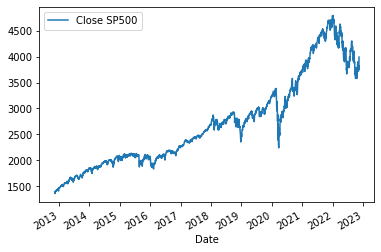

In [ ]:
df_sp500_clean[["Close SP500"]].plot.line()

## Combined Dataset (ETH, SP500, NASDAQ)

### Description
The data shows the change in the ETH, SP500, NASDAQ over time combined.

In [ ]:
df_stocks_crypto = df_nasdaq_clean.join(
    df_sp500_clean
).join(
    df_ethereum_clean
).dropna()

df_stocks_crypto

,Close NASDAQ,% Day Change NASDAQ,Max Difference NASDAQ,Close SP500,% Day Change SP500,Max Difference SP500,% Day Change ETH,Max Difference ETH,Close ETH
Date,,,,,,,,,
2022-11-11,11323.33,0.017850,282.60,3992.93,0.007369,56.66,-0.008978,90.965698,1287.221069
2022-11-10,11114.15,0.022539,339.16,3956.37,0.024996,98.44,0.181216,248.668579,1299.464600
2022-11-09,10353.17,-0.016946,220.96,3748.57,-0.016366,73.98,-0.174742,252.457885,1100.169800
2022-11-08,10616.20,0.000440,272.91,3828.11,0.002905,73.12,-0.150156,315.356690,1332.835571
2022-11-07,10564.52,0.004524,159.05,3806.80,0.006901,49.25,-0.002179,54.059815,1568.591309
...,...,...,...,...,...,...,...,...,...
2017-11-17,6782.79,-0.001716,20.32,2578.85,-0.001583,6.34,0.006745,7.440979,332.394012
2017-11-16,6793.29,0.007558,64.34,2585.64,0.004932,17.14,-0.007554,12.553009,330.924011
2017-11-15,6706.21,0.000825,58.01,2564.62,-0.001880,15.39,-0.013632,11.098999,333.356995


## ETH NASDAQ AND SP500 Correlation

### Description
This visual shows how ETH, SP500, and NASDAQ are correlated over time.

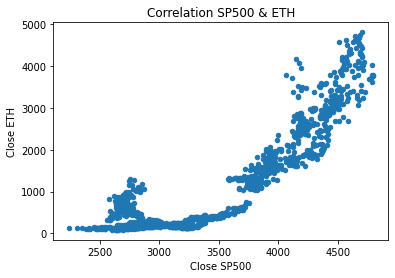

In [ ]:
df_stocks_crypto.plot(
    kind="scatter",
    x="Close SP500",
    y="Close ETH",
    title = "Correlation SP500 & ETH"
)

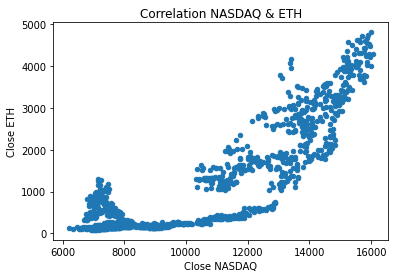

In [ ]:
df_stocks_crypto.plot(
    kind="scatter",
    x="Close NASDAQ",
    y="Close ETH",
    title = "Correlation NASDAQ & ETH"
)

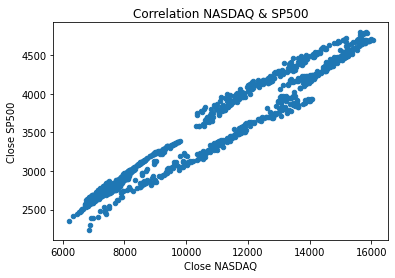

In [ ]:
df_stocks_crypto.plot(
    kind="scatter",
    x="Close NASDAQ",
    y="Close SP500",
    title = "Correlation NASDAQ & SP500"
)

## GDP Dataset

### Description
The data shows the change in GDP from 1980 to 2022, plus projections for 2023-2027. Data has been filtered out to only show the world's top 5 GDP's for display purposes.

In [ ]:
# Import GDP dataset and condense into new DataFrame
df_gdp = pd.read_csv(repo + "GDP-Changes.csv")
df_gdp_clean = df_gdp.rename(
    columns = {"Real GDP growth (Annual percent change)":"Year"}
)[[
    "Year", 
    "United States", 
    "China, People's Republic of", 
    "Japan", 
    "Germany",
    "United Kingdom"
]].set_index("Year")

df_gdp_clean.head()

,United States,"China, People's Republic of",Japan,Germany,United Kingdom
Year,,,,,
1980,-0.3,7.9,3.2,1.3,-2.1
1981,2.5,5.1,4.2,0.1,-0.7
1982,-1.8,9.0,3.3,-0.8,2.0
1983,4.6,10.8,3.5,1.6,4.2
1984,7.2,15.2,4.5,2.8,2.2


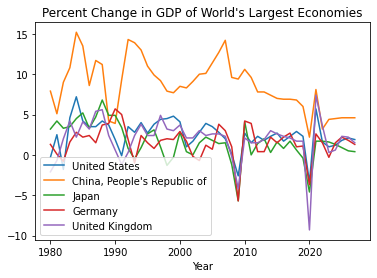

In [ ]:
df_gdp_clean.plot(
    kind="line",
    title="Percent Change in GDP of World's Largest Economies"
)

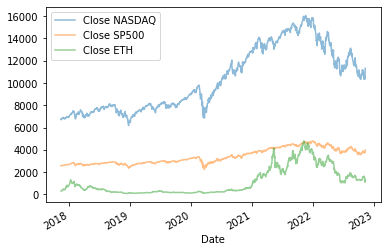

In [ ]:
df_stocks_crypto[[
    "Close NASDAQ", "Close SP500", "Close ETH"
]].plot(
    kind="line",
    alpha=0.5
)

# NEW DATASETS to CSV

## Description
Transferring our new Clean Datasets to CSV's so we can work with it on a new notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_ethereum_clean.to_csv("/content/drive/MyDrive/ethereum.csv")
df_stocks_crypto.to_csv("/content/drive/MyDrive/stocks_crypto.csv")

Mounted at /content/drive
